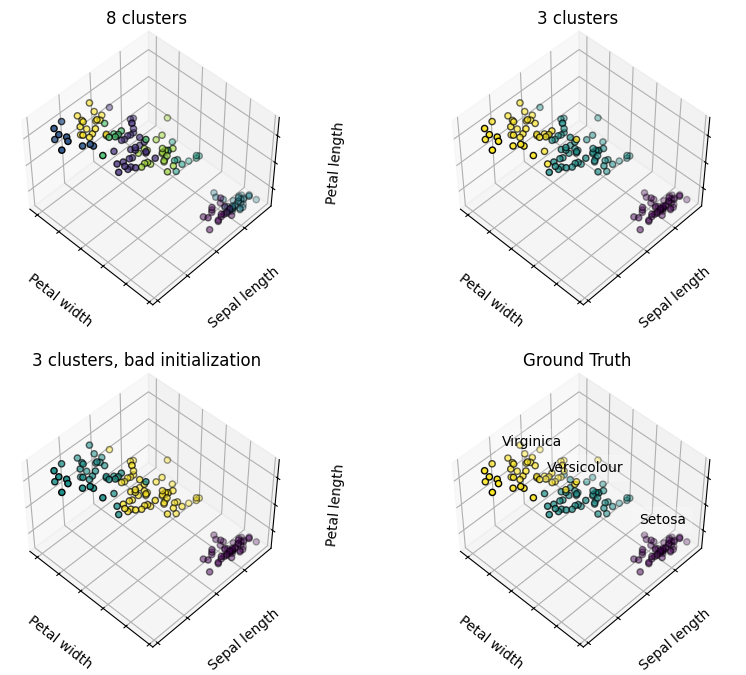

In [7]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [14]:
from sklearn import datasets, cluster
X=datasets.load_iris().data
clust=cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')

labels=clust.fit_predict(X)


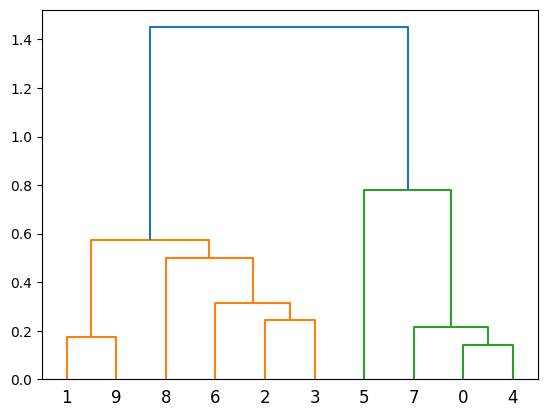

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage,single
import matplotlib.pyplot as plt
import numpy as np

linkage_matrix=linkage(X[:10],'ward')
dendrogram(linkage_matrix)
plt.show()


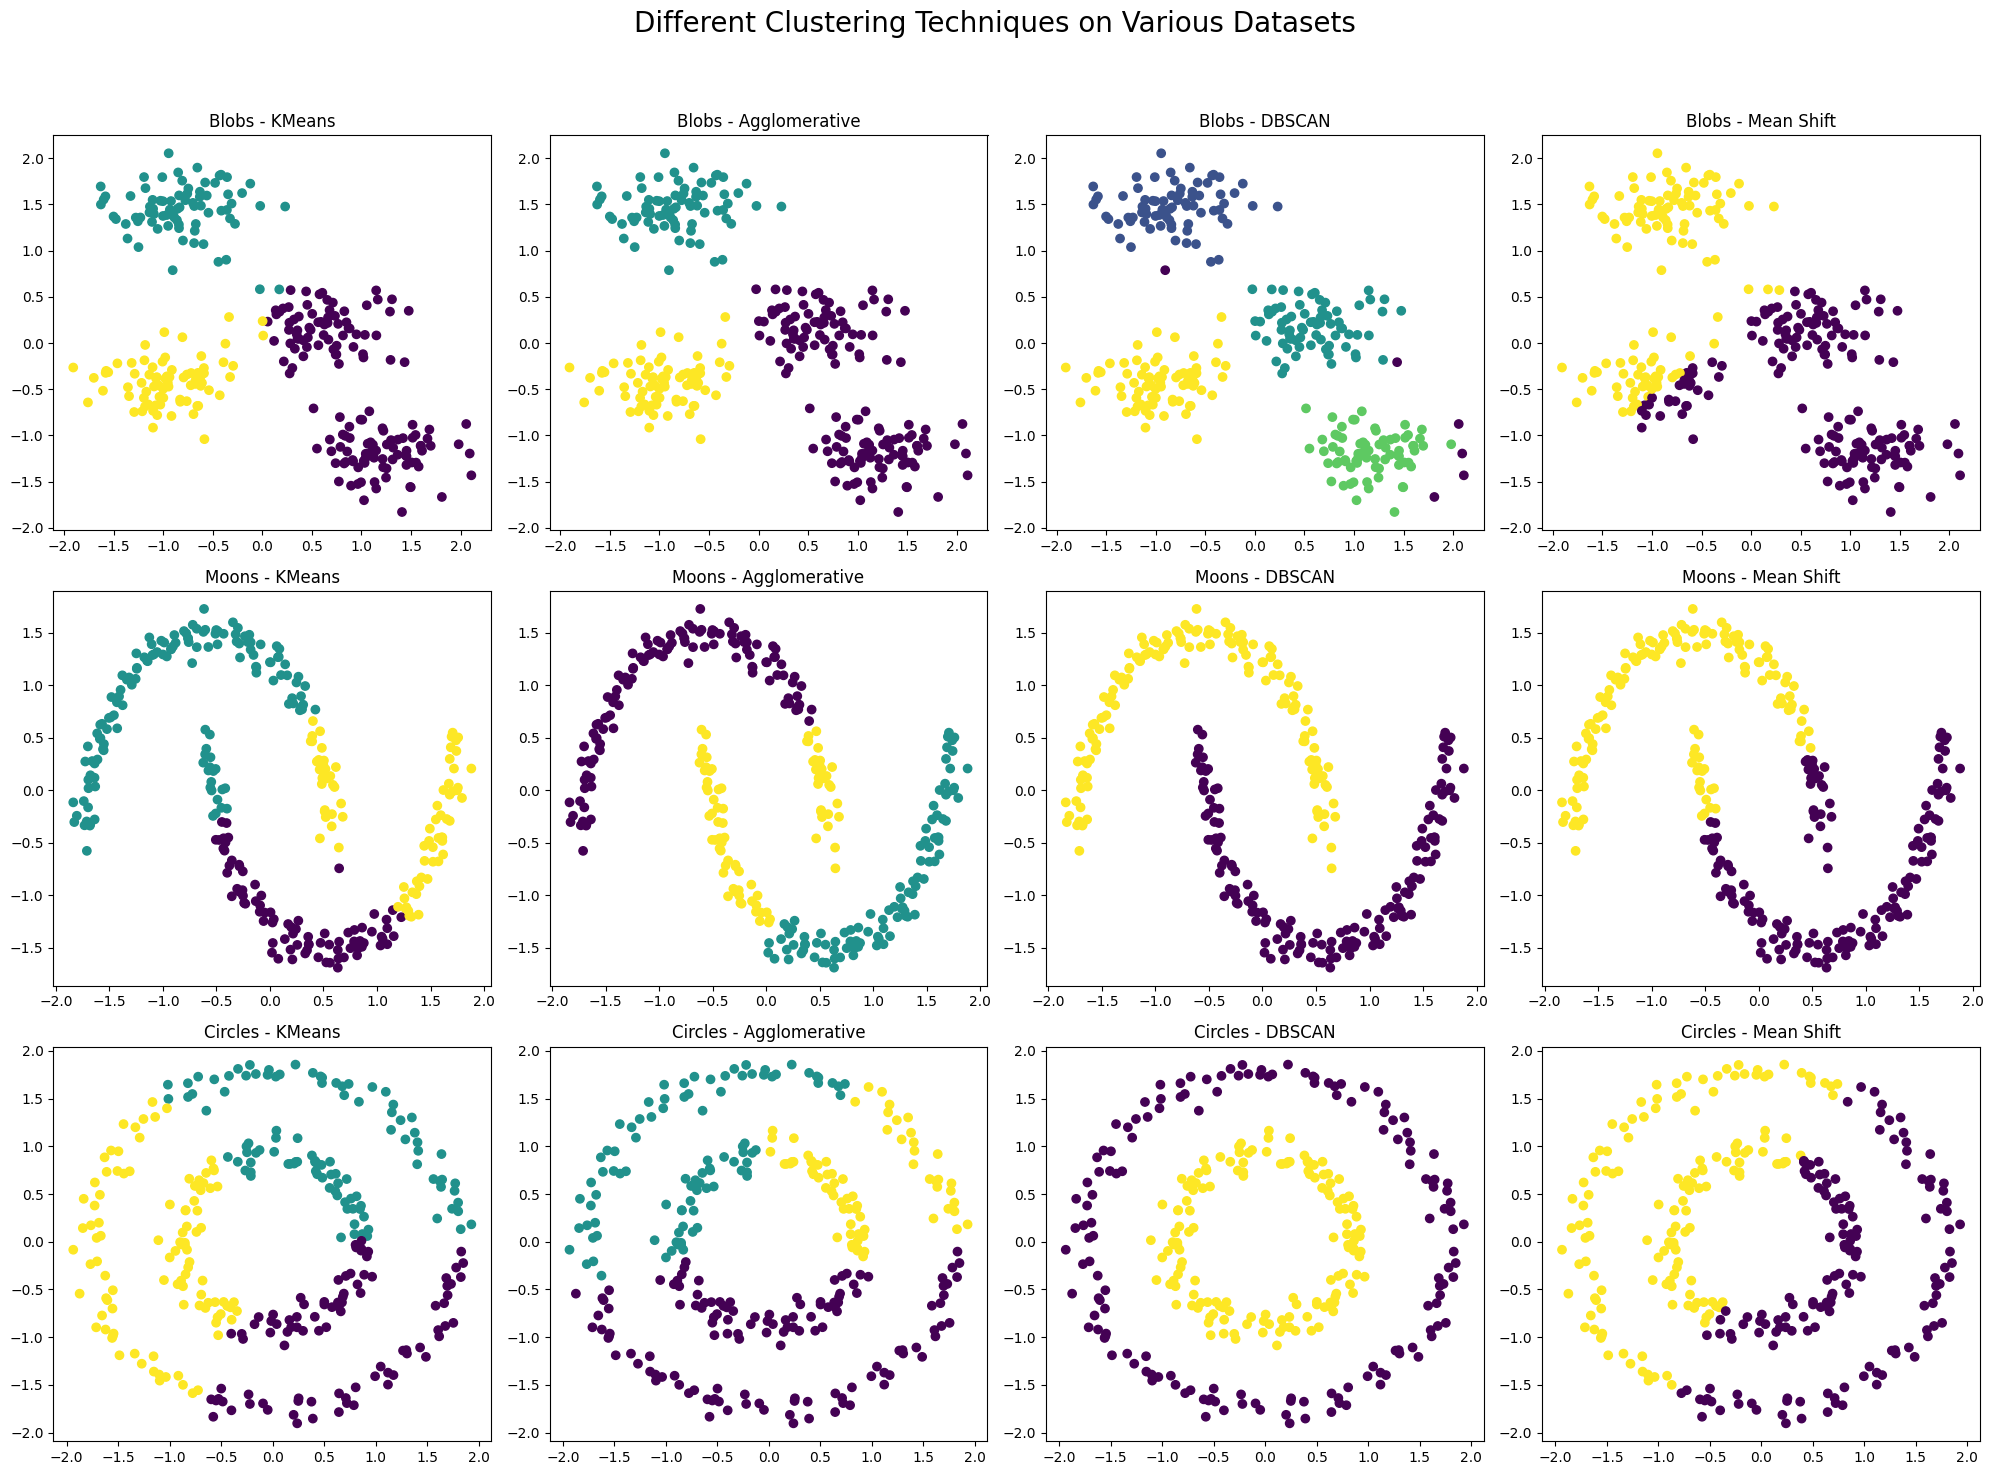

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.preprocessing import StandardScaler

# Generate datasets
datasets = [
    ("Blobs", make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)),
    ("Moons", make_moons(n_samples=300, noise=0.05, random_state=0)),
    ("Circles", make_circles(n_samples=300, factor=0.5, noise=0.05))
]

# Plotting settings
fig, axes = plt.subplots(len(datasets), 4, figsize=(20, 15))
plt.suptitle('Different Clustering Techniques on Various Datasets', fontsize=20)

# Iterate over datasets
for i, (name, (X, y)) in enumerate(datasets):
    # Standardize the dataset (important for DBSCAN and MeanShift)
    X = StandardScaler().fit_transform(X)
    
    # K-Means Clustering
    kmeans = KMeans(n_clusters=3)
    y_kmeans = kmeans.fit_predict(X)
    axes[i, 0].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
    axes[i, 0].set_title(f'{name} - KMeans')

    # Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=3)
    y_agg = agg.fit_predict(X)
    axes[i, 1].scatter(X[:, 0], X[:, 1], c=y_agg, cmap='viridis')
    axes[i, 1].set_title(f'{name} - Agglomerative')

    # DBSCAN Clustering
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    y_dbscan = dbscan.fit_predict(X)
    axes[i, 2].scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis')
    axes[i, 2].set_title(f'{name} - DBSCAN')

    # Mean Shift Clustering
    mean_shift = MeanShift()
    y_mean_shift = mean_shift.fit_predict(X)
    axes[i, 3].scatter(X[:, 0], X[:, 1], c=y_mean_shift, cmap='viridis')
    axes[i, 3].set_title(f'{name} - Mean Shift')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


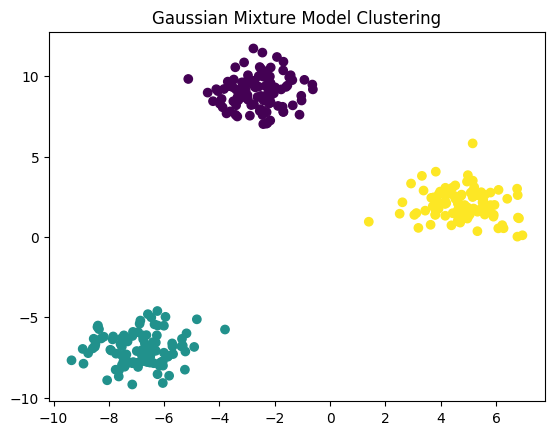

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Fit GMM model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels = gmm.predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.show()


Silhouette Score: 0.8480303059596955


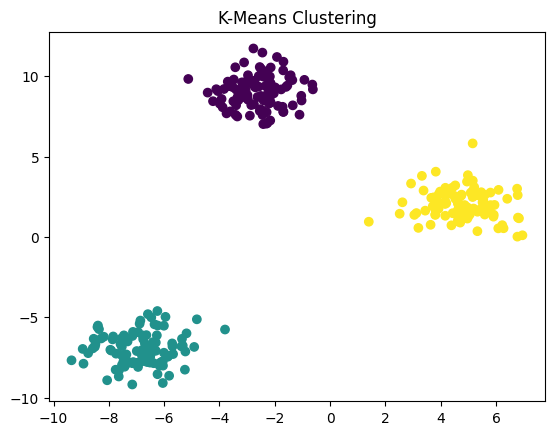

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Fit K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate Silhouette Score
score = silhouette_score(X, labels)
print(f'Silhouette Score: {score}')

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()
